In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from tqdm import tqdm
import seaborn as sns
from gensim.similarities import Similarity
from wordcloud import WordCloud
import random
import matplotlib.colors as mcolors #для облака слов
from gensim.test.utils import get_tmpfile
from gensim import models
from sklearn.metrics.pairwise import cosine_similarity
from gensim import matutils
from sklearn.metrics.pairwise import cosine_distances
import gensim
from collections import defaultdict

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.models import TfidfModel, LsiModel
from gensim.matutils import corpus2dense
from ast import literal_eval
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim.similarities import MatrixSimilarity
from gensim import similarities

from sklearn.metrics import pairwise_distances


In [2]:
from google.colab import files

uploaded = files.upload()

Saving processed_data4(2).csv to processed_data4(2).csv
Saving processed_data2(2).csv to processed_data2(2).csv
Saving processed_data(2).csv to processed_data(2).csv
Saving processed_data3(2).csv to processed_data3(2).csv


In [6]:
data = pd.read_csv('/content/processed_data(2).csv')
data2 = pd.read_csv('/content/processed_data2(2).csv')
data3 = pd.read_csv('/content/processed_data3(2).csv')
data4 = pd.read_csv('/content/processed_data4(2).csv')
data3

title  \
0         Загитова согласилась вести «Ледниковый период»   
1              Объяснена опасность однообразного питания   
2            Ефремов систематически употреблял наркотики   
3      Пенсионер устроил у себя дома отель и попал по...   
4                      В Арктике обнаружили новый пролив   
...                                                  ...   
10382  В России пройдут учения по обеспечению устойчи...   
10383  Самолеты НАТО стали чаще летать у границ Росси...   
10384  Сюткин оценил шутку Шнурова над обидевшим Гага...   
10385  Владимир Путин откроет железнодорожное движени...   
10386  Концертный директор прокомментировал скандал Б...   

                                                    text  \
0      ['олимпийский_чемпионка', 'фигурный_катание', ...   
1      ['российский', 'врач_диетолог', 'римма', 'мойс...   
2      ['актер_михаил_ефремов', 'систематически', 'уп...   
3      ['великобритания', 'пенсионер', 'жена', 'устра...   
4      ['участник', 'экспедиция', 'архипелаг', 'земля...   
...                                                  ...   
10382  ['всероссийский', 'учение', 'обеспечение', 'ус...   
10383  ['интенсивность', 'полет', 'российский', 'гран...   
10384  ['певец', 'валерий_сюткин', 'шутка', 'наставни...   
10385  ['владимир_путин', 'принимать_участие', 'церем...   
10386  ['концертный', 'директор', 'сергей_лавров', 'с...   

                                                fulltext  
0      Олимпийская чемпионка по фигурному катанию  Ал...  
1      Российский врач-диетолог Римма Мойсенко объясн...  
2      Актер  Михаил Ефремов  систематически употребл...  
3      В Великобритании пенсионер вместе с женой устр...  
4      Участники экспедиции на архипелаг Новая Земля ...  
...                                                  ...  
10382  Всероссийские учения по обеспечению устойчивой...  
10383  Интенсивность полетов у российских границ само...  
10384  Певец  Валерий Сюткин  в интервью порталу  Nat...  
10385  Владимир Путин  примет участие в церемонии отк...  
10386  Концертный директор Сергей Лавров высказался в...  

[10387 rows x 3 columns]

In [7]:
#преобразование типа колонки из строки в список
# Функция для преобразования строки в список
def convert_to_list(text):
    try:
        return literal_eval(text)
    except (ValueError, SyntaxError):
        return []

data['text'] = data['text'].apply(convert_to_list)
data2['text'] = data2['text'].apply(convert_to_list)
data3['text'] = data3['text'].apply(convert_to_list)
data4['text'] = data4['text'].apply(convert_to_list)
data3

title  \
0         Загитова согласилась вести «Ледниковый период»   
1              Объяснена опасность однообразного питания   
2            Ефремов систематически употреблял наркотики   
3      Пенсионер устроил у себя дома отель и попал по...   
4                      В Арктике обнаружили новый пролив   
...                                                  ...   
10382  В России пройдут учения по обеспечению устойчи...   
10383  Самолеты НАТО стали чаще летать у границ Росси...   
10384  Сюткин оценил шутку Шнурова над обидевшим Гага...   
10385  Владимир Путин откроет железнодорожное движени...   
10386  Концертный директор прокомментировал скандал Б...   

                                                    text  \
0      [олимпийский_чемпионка, фигурный_катание, алин...   
1      [российский, врач_диетолог, римма, мойсенко, о...   
2      [актер_михаил_ефремов, систематически, употреб...   
3      [великобритания, пенсионер, жена, устраивать, ...   
4      [участник, экспедиция, архипелаг, земля, аркти...   
...                                                  ...   
10382  [всероссийский, учение, обеспечение, устойчивы...   
10383  [интенсивность, полет, российский, граница, са...   
10384  [певец, валерий_сюткин, шутка, наставник, шоу,...   
10385  [владимир_путин, принимать_участие, церемония_...   
10386  [концертный, директор, сергей_лавров, скандал,...   

                                                fulltext  
0      Олимпийская чемпионка по фигурному катанию  Ал...  
1      Российский врач-диетолог Римма Мойсенко объясн...  
2      Актер  Михаил Ефремов  систематически употребл...  
3      В Великобритании пенсионер вместе с женой устр...  
4      Участники экспедиции на архипелаг Новая Земля ...  
...                                                  ...  
10382  Всероссийские учения по обеспечению устойчивой...  
10383  Интенсивность полетов у российских границ само...  
10384  Певец  Валерий Сюткин  в интервью порталу  Nat...  
10385  Владимир Путин  примет участие в церемонии отк...  
10386  Концертный директор Сергей Лавров высказался в...  

[10387 rows x 3 columns]

In [8]:
texts = data['text'].tolist() #корпус в виде списка документов
texts2 = data2['text'].tolist()
texts3 = data3['text'].tolist()
texts4 = data4['text'].tolist()

In [9]:
fulltexts = data['fulltext'].tolist() #необработанные тексты в виде списка документов
fulltexts2 = data2['fulltext'].tolist()
fulltexts3 = data3['fulltext'].tolist()
fulltexts4 = data4['fulltext'].tolist()

Зависимость когерентности от количества топиков

100%|██████████| 36/36 [33:06<00:00, 55.17s/it]


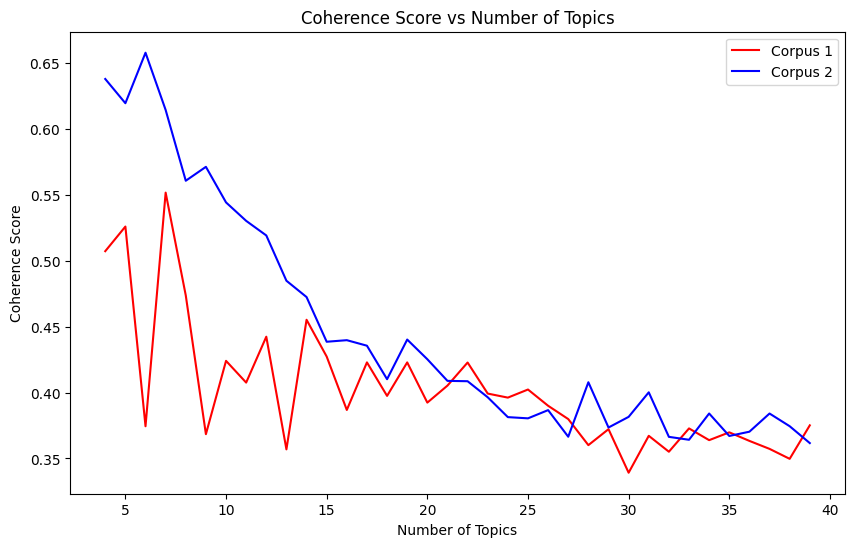

Dataset 1: Optimal number of topics: 7, Coherence score: 0.5516778915925838
Dataset 2: Optimal number of topics: 6, Coherence score: 0.6578363195417724


In [ ]:
#np.random.seed(76543)

# Список датасетов
datasets = [texts, texts2, texts3, texts4]

colors = ['red', 'blue', 'green', 'orange']  # список цветов для каждого датасета

start = 4
end = 40
step = 1
num_topics_range = range(start, end, step)

coherence_values_list = []
optimal_topics_list = []

for dataset in datasets:
    coherence_values = []
    optimal_topics = {'coherence': 0, 'num_topics': 0}

    dictionary = corpora.Dictionary(dataset)
    dictionary.filter_extremes(no_below=3)
    corpus = [dictionary.doc2bow(text) for text in dataset]
    tfidf_model = TfidfModel(corpus)
    corpus_tfidf = tfidf_model[corpus]

    for num_topics in tqdm(num_topics_range):
        model = LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, chunksize = 500, random_seed = 100)
        coherence_model = CoherenceModel(model=model, texts=dataset, dictionary=dictionary, coherence='c_v')
        coherence_value = coherence_model.get_coherence()
        coherence_values.append(coherence_value)

        if coherence_value > optimal_topics['coherence']:
            optimal_topics['coherence'] = coherence_value
            optimal_topics['num_topics'] = num_topics

    coherence_values_list.append(coherence_values)
    optimal_topics_list.append(optimal_topics)

plt.figure(figsize=(10, 6))

for i in range(len(datasets)):
    plt.plot(num_topics_range, coherence_values_list[i], label=f"Corpus {i+1}", color=colors[i])

plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()

for i, optimal_topics in enumerate(optimal_topics_list):
    dataset_name = f"Dataset {i+1}"
    coherence_score = optimal_topics['coherence']
    num_topics = optimal_topics['num_topics']
    print(f"{dataset_name}: Optimal number of topics: {num_topics}, Coherence score: {coherence_score}")

Вычисление 3 потенциальных моделей

In [11]:
dictionary = corpora.Dictionary(texts4)
dictionary.filter_extremes(no_below=10)
corpus = [dictionary.doc2bow(text) for text in texts4]
tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

dictionary2 = corpora.Dictionary(texts3)
dictionary2.filter_extremes(no_below=10)
corpus2 = [dictionary2.doc2bow(text) for text in texts3]
tfidf_model = TfidfModel(corpus2)
corpus_tfidf2 = tfidf_model[corpus2]

In [12]:
#np.random.seed(76543)
lsa_model = LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4, chunksize = 500, random_seed = 100)
coherence_model = CoherenceModel(model=lsa_model, texts=texts4, dictionary=dictionary, coherence='c_v')
coherence_value = coherence_model.get_coherence()
print(coherence_value)

lsa_model2 = LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10, chunksize = 500, random_seed = 100)
coherence_model = CoherenceModel(model=lsa_model2, texts=texts4, dictionary=dictionary, coherence='c_v')
coherence_value = coherence_model.get_coherence()
print(coherence_value)

lsa_model3 = LsiModel(corpus=corpus_tfidf2, id2word=dictionary2, num_topics=20, chunksize = 500, random_seed = 100)
coherence_model = CoherenceModel(model=lsa_model3, texts=texts3, dictionary=dictionary2, coherence='c_v')
coherence_value = coherence_model.get_coherence()
print(coherence_value)

0.6803537817919635
0.5796391301784242
0.4603658453209628


In [13]:
topics = lsa_model.show_topics(num_topics=10, num_words = 5)
for topic in topics:
    print(topic)

(0, '0.202*"коронавирус" + 0.157*"сша" + 0.137*"страна" + 0.136*"covid" + 0.136*"россия"')
(1, '0.307*"коронавирус" + 0.235*"covid" + 0.184*"случай" + 0.174*"скончаться" + 0.160*"пациент"')
(2, '0.536*"белоруссия" + 0.203*"белорусский" + 0.202*"минск" + 0.180*"лукашенко" + 0.150*"выборы"')
(3, '-0.241*"иран" + -0.225*"сша" + -0.207*"ирак" + -0.195*"турция" + -0.184*"турецкий"')


In [14]:
topics = lsa_model2.show_topics(num_topics=10, num_words = 10)
for topic in topics:
    print(topic)

(0, '0.201*"коронавирус" + 0.159*"сша" + 0.136*"страна" + 0.136*"россия" + 0.135*"covid" + 0.115*"президент" + 0.105*"китай" + 0.094*"ситуация" + 0.093*"случай" + 0.088*"российский"')
(1, '0.324*"коронавирус" + 0.240*"covid" + 0.186*"пациент" + 0.179*"случай" + 0.173*"скончаться" + 0.138*"заражать" + 0.138*"случай_заражение" + 0.138*"заболевание" + 0.126*"выявлять" + 0.124*"китай"')
(2, '0.324*"сша" + 0.201*"иран" + 0.181*"трамп" + 0.160*"президент" + -0.157*"ребенок" + -0.155*"рубль" + 0.148*"китай" + 0.137*"военный" + 0.125*"ирак" + 0.107*"американский"')
(3, '-0.313*"белоруссия" + -0.165*"полиция" + 0.165*"процент" + 0.154*"рубль" + -0.131*"минск" + -0.126*"белорусский" + -0.126*"протест" + -0.122*"протестовать" + 0.119*"доллар" + -0.116*"полицейский"')
(4, '0.417*"белоруссия" + 0.172*"процент" + 0.154*"белорусский" + -0.152*"иран" + 0.148*"минск" + 0.142*"лукашенко" + -0.129*"военный" + -0.125*"ирак" + 0.124*"выборы" + -0.123*"сша"')
(5, '0.328*"турция" + 0.307*"турецкий" + -0.198*

In [15]:
topics = lsa_model3.show_topics(num_topics=21, num_words = 10)
for topic in topics:
    print(topic)

(0, '0.186*"коронавирус" + 0.133*"россия" + 0.131*"страна" + 0.126*"сша" + 0.090*"украина" + 0.089*"президент" + 0.089*"covid" + 0.086*"российский" + 0.086*"компания" + 0.082*"власть"')
(1, '-0.418*"коронавирус" + -0.227*"covid" + -0.164*"пациент" + -0.163*"случай" + -0.159*"скончаться" + -0.152*"заражать" + -0.149*"заболевание" + -0.143*"китай" + -0.143*"случай_заражение" + -0.120*"вирус"')
(2, '-0.230*"сша" + 0.193*"ребенок" + -0.178*"украина" + 0.152*"ефремов" + -0.151*"трамп" + -0.149*"президент" + -0.145*"военный" + 0.144*"актер" + -0.144*"иран" + 0.129*"женщина"')
(3, '0.256*"рубль" + -0.198*"полиция" + -0.152*"полицейский" + 0.149*"процент" + 0.145*"компания" + 0.114*"доллар" + -0.113*"ефремов" + -0.112*"погибать" + -0.098*"мужчина" + -0.098*"военный"')
(4, '0.247*"фильм" + 0.188*"актер" + 0.173*"сша" + -0.170*"рубль" + 0.152*"трамп" + -0.125*"полиция" + 0.118*"режиссер" + 0.114*"американский" + 0.111*"песня" + 0.105*"актриса"')
(5, '-0.306*"белоруссия" + 0.249*"самолет" + -0.19

Облака слов:

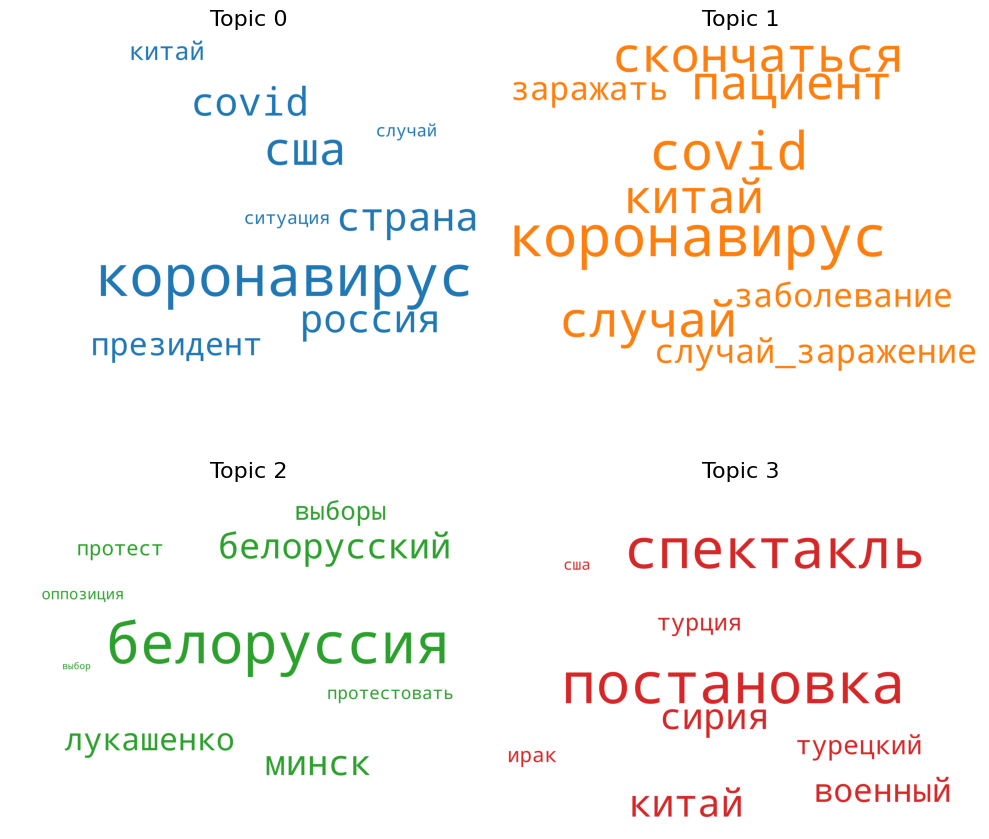

In [16]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lsa_model.show_topics(formatted=False, num_words=10)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])

    topic_weights = list(topic_words.values())
    min_weight = min(topic_weights)
    max_weight = max(topic_weights)

    scaling_factor = 2.5

    normalized_topic_words = {word: (weight - min_weight) / (max_weight - min_weight) * scaling_factor
                              for word, weight in topic_words.items()}

    cloud.generate_from_frequencies(normalized_topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

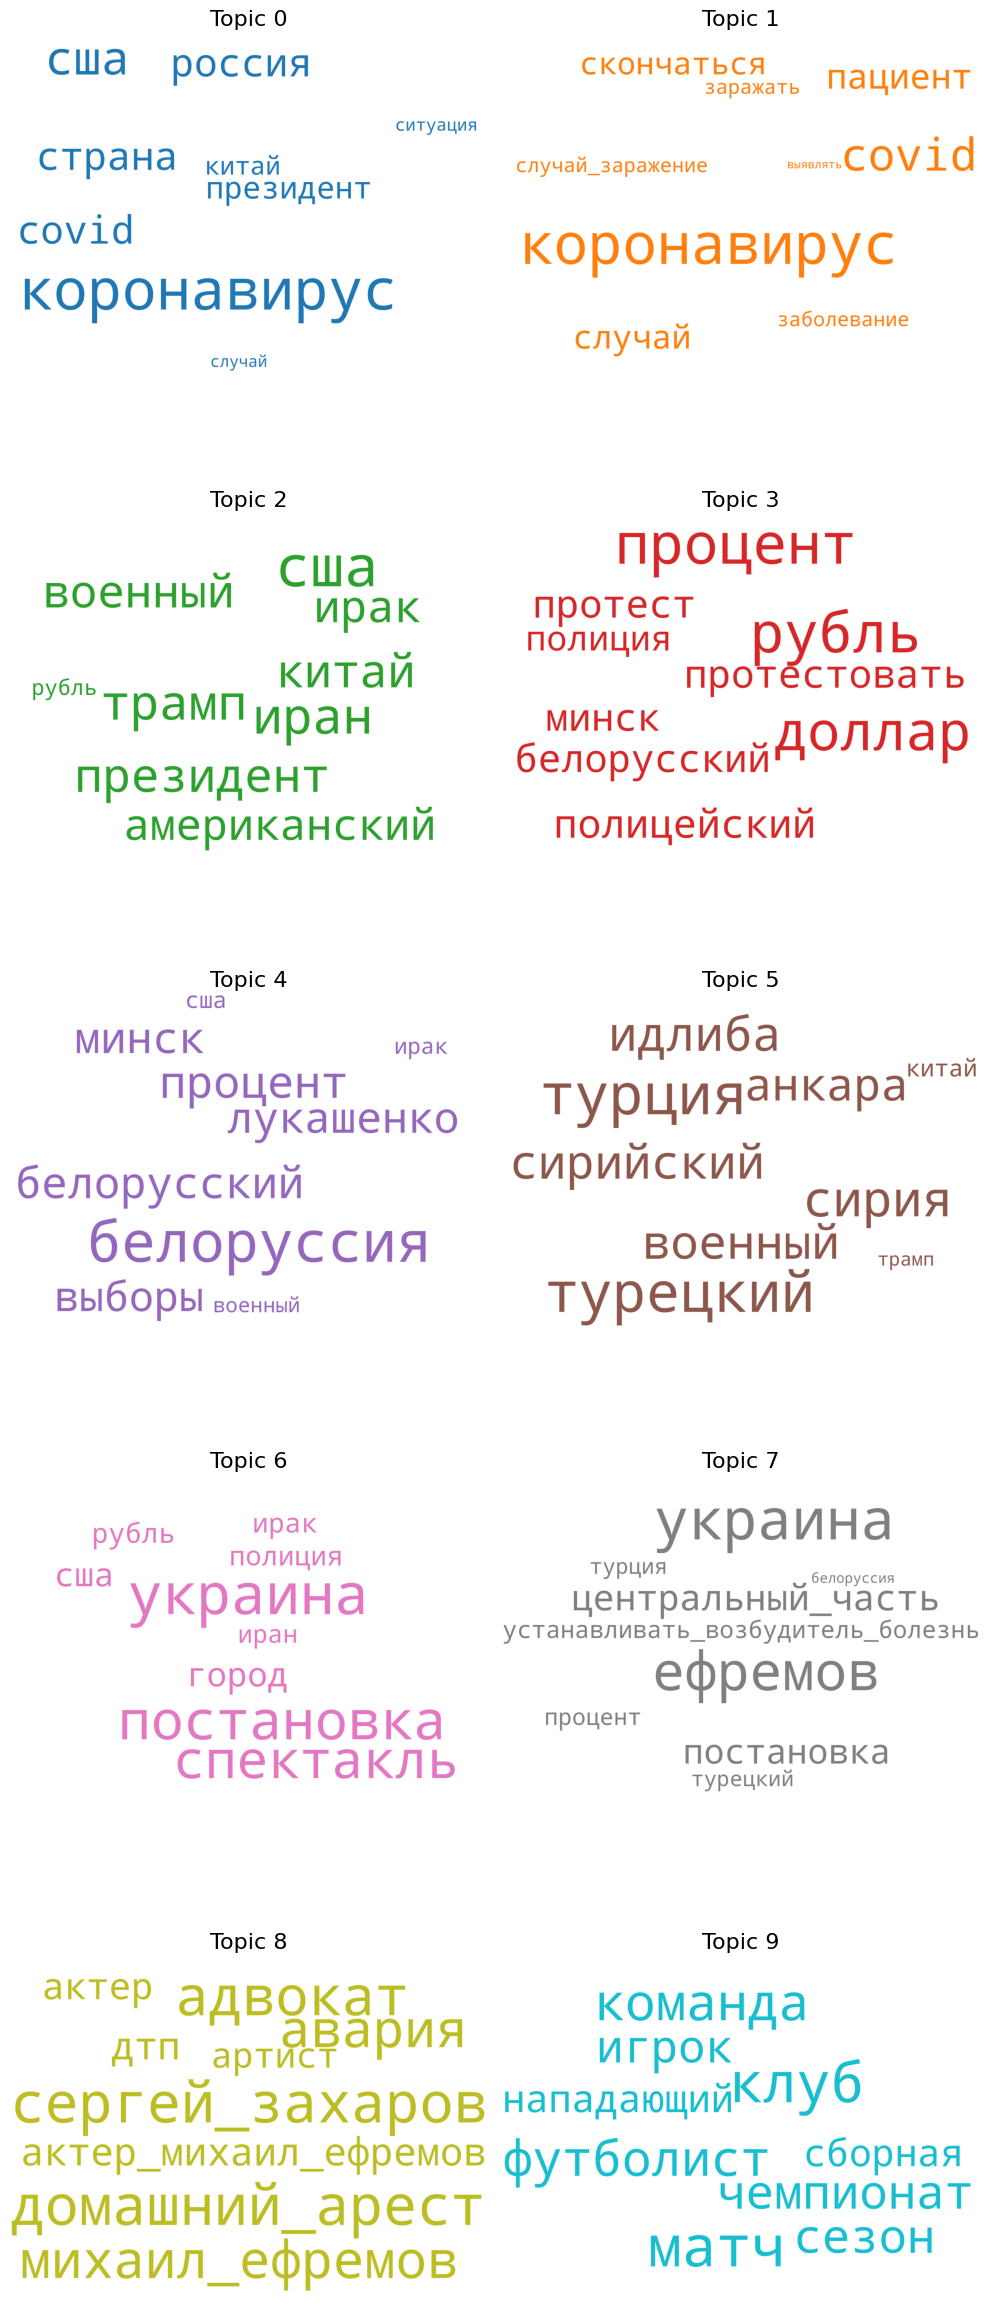

In [17]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lsa_model2.show_topics(formatted=False, num_words=10)

fig, axes = plt.subplots(5, 2, figsize=(10, 25), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])

    topic_weights = list(topic_words.values())
    min_weight = min(topic_weights)
    max_weight = max(topic_weights)

    scaling_factor = 2.5

    normalized_topic_words = {word: (weight - min_weight) / (max_weight - min_weight) * scaling_factor
                              for word, weight in topic_words.items()}

    cloud.generate_from_frequencies(normalized_topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

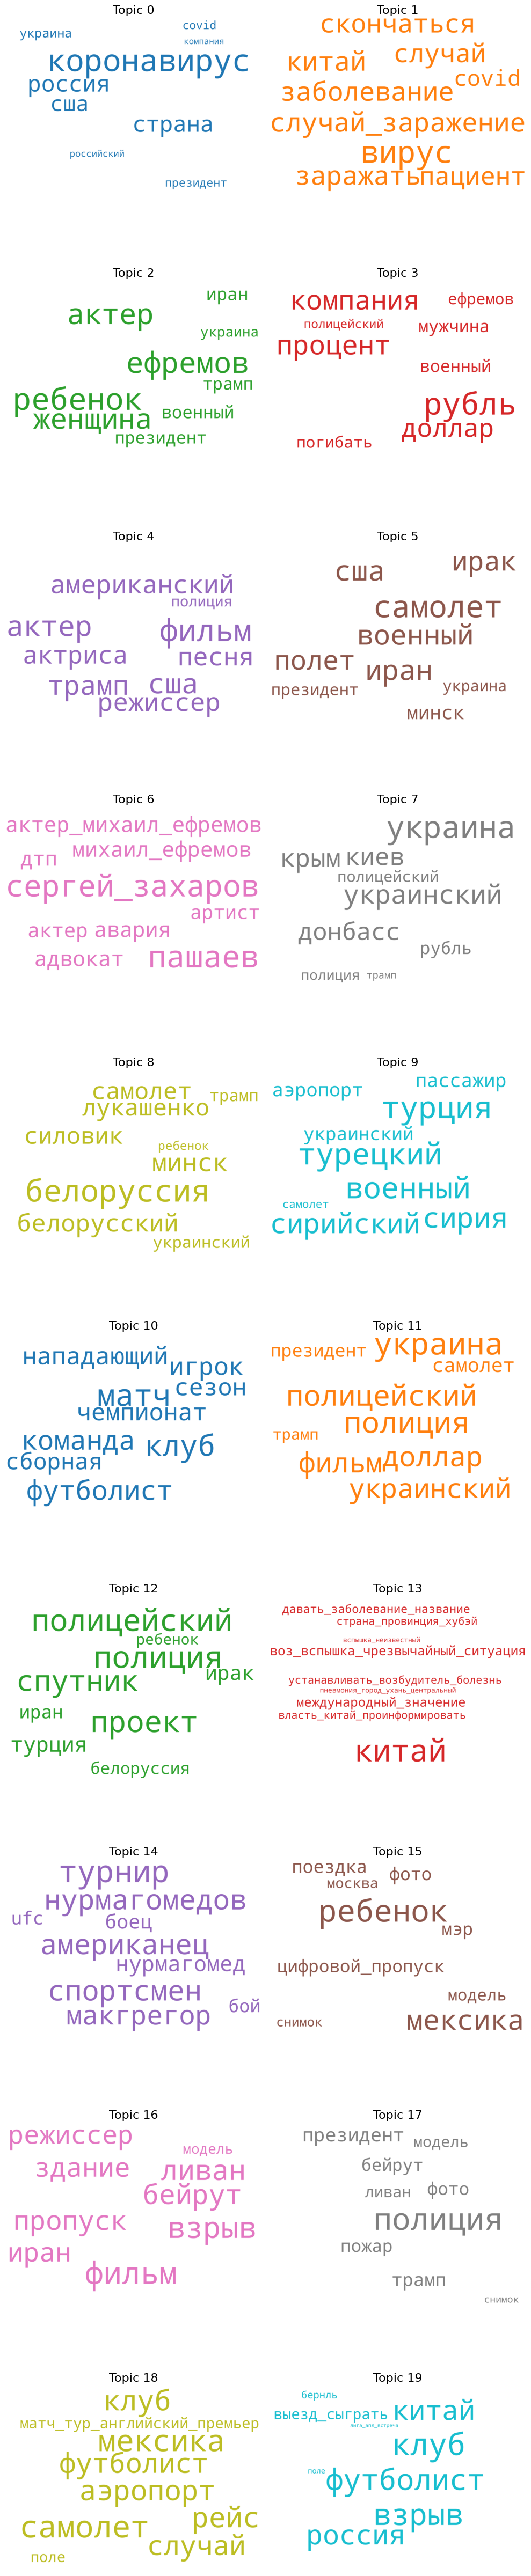

In [19]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 2

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lsa_model3.show_topics(formatted=False, num_words=10)

fig, axes = plt.subplots(10, 2, figsize=(10, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])

    topic_weights = list(topic_words.values())
    min_weight = min(topic_weights)
    max_weight = max(topic_weights)

    scaling_factor = 2.5

    normalized_topic_words = {word: (weight - min_weight) / (max_weight - min_weight) * scaling_factor
                              for word, weight in topic_words.items()}

    cloud.generate_from_frequencies(normalized_topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Распределение документов по темам, если учитывать тему как сумму весов

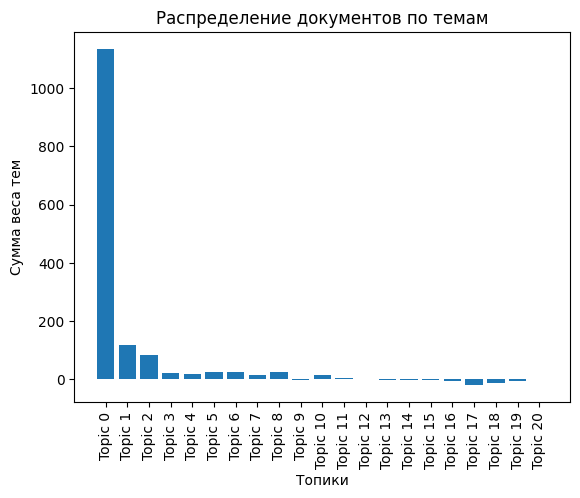

In [20]:
num_topics = 21

topic_term_matrix = lsa_model3.get_topics()

document_topic_weights = np.zeros((len(corpus_tfidf2), num_topics))

for i, doc in enumerate(corpus_tfidf2):
    doc_topics = lsa_model3[doc]
    for topic, weight in doc_topics:
        document_topic_weights[i][topic] = weight

topic_weights = np.sum(document_topic_weights, axis=0)

topics = [f"Topic {i}" for i in range(num_topics)]

plt.bar(topics, topic_weights)
plt.xlabel('Топики')
plt.ylabel('Сумма веса тем')
plt.title('Распределение документов по темам')
plt.xticks(rotation=90)
plt.show()

Отобразим доминирующую тему и ее процентный вклад в каждом документе

In [21]:
document_data = []

for doc_id, doc in enumerate(corpus_tfidf2):
    topic_weights = lsa_model3[doc]

    dominant_topic = max(topic_weights, key=lambda x: abs(x[1]))
    topic_id = dominant_topic[0]
    topic_keywords = ', '.join([word for word, _ in lsa_model3.show_topic(topic_id)])
    topic_importance = dominant_topic[1]

    document_data.append({
        'Document_No': doc_id,
        'Dominant_Topic': topic_id,
        'Topic_Importance': topic_importance,
        'Keywords': topic_keywords,
        'Full_Text': fulltexts3[doc_id],
        'Text' : texts3[doc_id]
    })

df_topic_sents_keywords = pd.DataFrame(document_data)
min_importance = abs(df_topic_sents_keywords['Topic_Importance']).min()
print(f"Минимальное значение по модулю: {min_importance}")
display(df_topic_sents_keywords[['Document_No', 'Dominant_Topic','Topic_Importance', 'Keywords', 'Text']])

Минимальное значение по модулю: 0.024771462422922243


Document_No  Dominant_Topic  Topic_Importance  \
0                0              10          0.115326   
1                1               0          0.061430   
2                2               6         -0.472028   
3                3               0          0.131310   
4                4               0          0.074531   
...            ...             ...               ...   
10382        10382               0          0.104976   
10383        10383               5          0.148277   
10384        10384               4          0.087441   
10385        10385               0          0.111806   
10386        10386               0          0.099407   

                                                Keywords  \
0      матч, клуб, футболист, команда, игрок, нападаю...   
1      коронавирус, россия, страна, сша, украина, пре...   
2      ефремов, артист, актер, дтп, михаил_ефремов, а...   
3      коронавирус, россия, страна, сша, украина, пре...   
4      коронавирус, россия, страна, сша, украина, пре...   
...                                                  ...   
10382  коронавирус, россия, страна, сша, украина, пре...   
10383  белоруссия, самолет, украина, президент, сша, ...   
10384  фильм, актер, сша, рубль, трамп, полиция, режи...   
10385  коронавирус, россия, страна, сша, украина, пре...   
10386  коронавирус, россия, страна, сша, украина, пре...   

                                                    Text  
0      [олимпийский_чемпионка, фигурный_катание, алин...  
1      [российский, врач_диетолог, римма, мойсенко, о...  
2      [актер_михаил_ефремов, систематически, употреб...  
3      [великобритания, пенсионер, жена, устраивать, ...  
4      [участник, экспедиция, архипелаг, земля, аркти...  
...                                                  ...  
10382  [всероссийский, учение, обеспечение, устойчивы...  
10383  [интенсивность, полет, российский, граница, са...  
10384  [певец, валерий_сюткин, шутка, наставник, шоу,...  
10385  [владимир_путин, принимать_участие, церемония_...  
10386  [концертный, директор, сергей_лавров, скандал,...  

[10387 rows x 5 columns]

Распределение документов по доминирующим темам

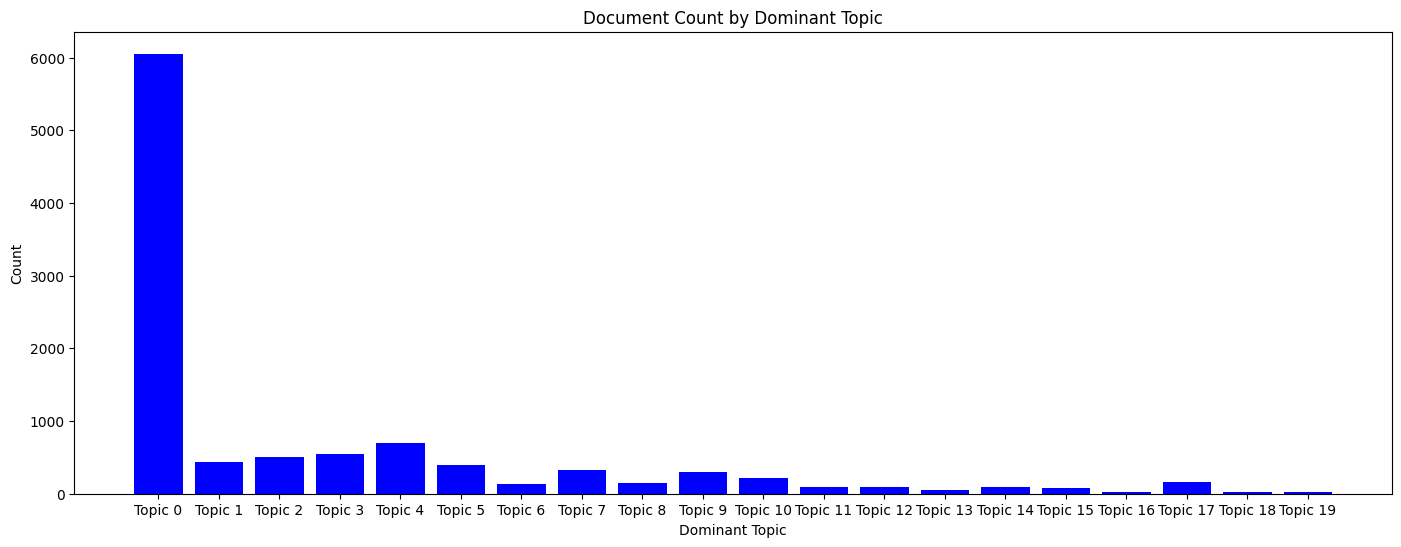

In [22]:
topic_counts = df_topic_sents_keywords.groupby('Dominant_Topic').size().reset_index(name='Count')

plt.figure(figsize=(17, 6))
bars = plt.bar(topic_counts['Dominant_Topic'], topic_counts['Count'], color='blue')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Document Count by Dominant Topic')
topics = sorted(df_topic_sents_keywords['Dominant_Topic'].unique())
plt.xticks(topics, [f'Topic {topic}' for topic in topics])
plt.show()

Присовим каждому документу доминирющую тему и отсеим все документы, для которых доминирующая тема не меньше 0.1.

In [23]:
document_data = []

for doc_id, doc in enumerate(corpus_tfidf2):
    topic_weights = lsa_model3[doc]

    dominant_topic = max(topic_weights, key=lambda x: abs(x[1]))
    topic_id = dominant_topic[0]
    topic_keywords = ', '.join([word for word, _ in lsa_model3.show_topic(topic_id)])
    topic_importance = dominant_topic[1]

    document_data.append({
        'Document_No': doc_id,
        'Dominant_Topic': topic_id,
        'Topic_Importance': topic_importance,
        'Keywords': topic_keywords,
        'Full_Text': fulltexts3[doc_id],
        'Text' : texts3[doc_id]
    })

df_topic_sents_keywords = pd.DataFrame(document_data)
filtered_df = df_topic_sents_keywords[abs(df_topic_sents_keywords['Topic_Importance']) > 0.1]
display(filtered_df[['Document_No', 'Dominant_Topic','Topic_Importance', 'Keywords', 'Text']])
percentage_remaining = (len(filtered_df) / len(df_topic_sents_keywords)) * 100
print(f"Процент оставшихся строк: {percentage_remaining:.2f}%")

Document_No  Dominant_Topic  Topic_Importance  \
0                0              10          0.115326   
2                2               6         -0.472028   
3                3               0          0.131310   
5                5               0          0.114270   
7                7               8          0.224294   
...            ...             ...               ...   
10379        10379               0          0.106192   
10380        10380               0          0.136274   
10382        10382               0          0.104976   
10383        10383               5          0.148277   
10385        10385               0          0.111806   

                                                Keywords  \
0      матч, клуб, футболист, команда, игрок, нападаю...   
2      ефремов, артист, актер, дтп, михаил_ефремов, а...   
3      коронавирус, россия, страна, сша, украина, пре...   
5      коронавирус, россия, страна, сша, украина, пре...   
7      белоруссия, украина, ребенок, минск, белорусск...   
...                                                  ...   
10379  коронавирус, россия, страна, сша, украина, пре...   
10380  коронавирус, россия, страна, сша, украина, пре...   
10382  коронавирус, россия, страна, сша, украина, пре...   
10383  белоруссия, самолет, украина, президент, сша, ...   
10385  коронавирус, россия, страна, сша, украина, пре...   

                                                    Text  
0      [олимпийский_чемпионка, фигурный_катание, алин...  
2      [актер_михаил_ефремов, систематически, употреб...  
3      [великобритания, пенсионер, жена, устраивать, ...  
5      [прокурор, манон, риддербекс, судебный_заседан...  
7      [белоруссия, протест, пострадать, сотрудник, м...  
...                                                  ...  
10379  [южный, курильский, районный_суд, капитан, япо...  
10380  [госкорпорация_росатый, будущее, принимать, ст...  
10382  [всероссийский, учение, обеспечение, устойчивы...  
10383  [интенсивность, полет, российский, граница, са...  
10385  [владимир_путин, принимать_участие, церемония_...  

[7135 rows x 5 columns]

Процент оставшихся строк: 68.69%


Распределение документов по доминируюим темам с учетом порога принадлежности.

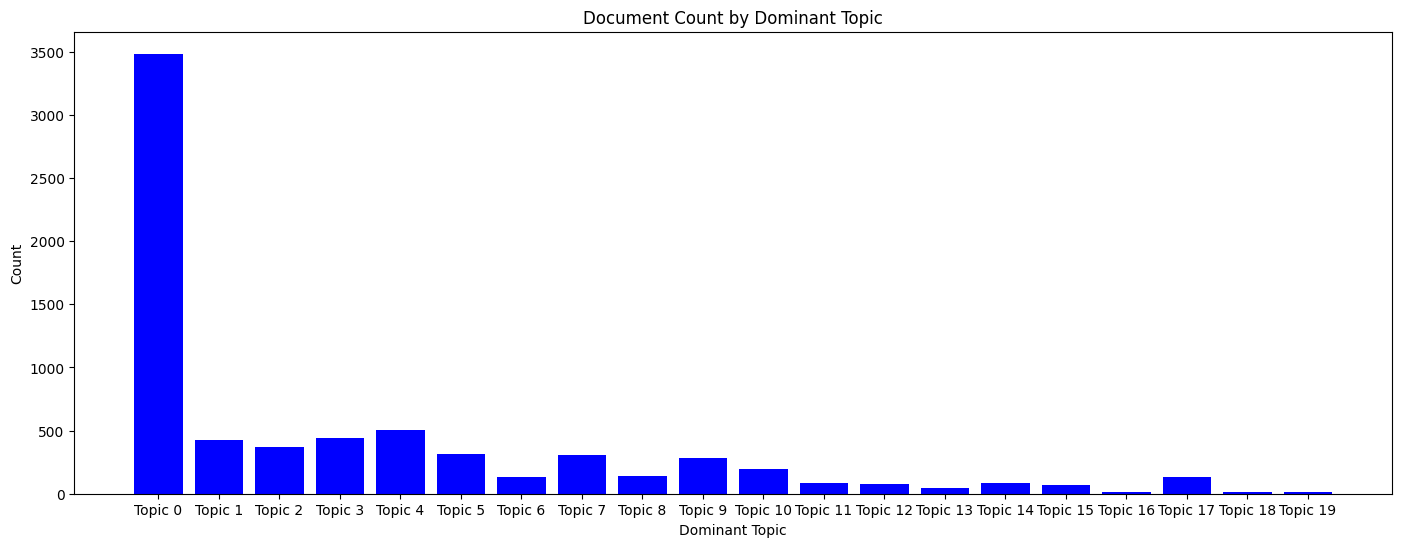

In [35]:
topic_counts = filtered_df.groupby('Dominant_Topic').size().reset_index(name='Count')

plt.figure(figsize=(17, 6))
bars = plt.bar(topic_counts['Dominant_Topic'], topic_counts['Count'], color='blue')

plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.title('Document Count by Dominant Topic')

topics = sorted(filtered_df['Dominant_Topic'].unique())
plt.xticks(topics, [f'Topic {topic}' for topic in topics])

plt.show()

Самый представительный документ для каждой темы

In [25]:
representative_docs = filtered_df.groupby('Dominant_Topic').apply(lambda x: x.loc[x['Topic_Importance'].idxmax()])

new_df = pd.DataFrame({
    'Topic_Num': representative_docs['Dominant_Topic'],
    'Keywords': representative_docs['Keywords'],
    'Topic_Importance': representative_docs['Topic_Importance'],
    'Text': representative_docs['Text']
}).reset_index(drop=True)

new_df.head(21)

Topic_Num                                           Keywords  \
0           0  коронавирус, россия, страна, сша, украина, пре...   
1           1  коронавирус, covid, пациент, случай, скончатьс...   
2           2  сша, ребенок, украина, ефремов, трамп, президе...   
3           3  рубль, полиция, полицейский, процент, компания...   
4           4  фильм, актер, сша, рубль, трамп, полиция, режи...   
5           5  белоруссия, самолет, украина, президент, сша, ...   
6           6  ефремов, артист, актер, дтп, михаил_ефремов, а...   
7           7  украина, сша, трамп, украинский, полиция, крым...   
8           8  белоруссия, украина, ребенок, минск, белорусск...   
9           9  украина, самолет, турция, турецкий, военный, с...   
10         10  матч, клуб, футболист, команда, игрок, нападаю...   
11         11  ребенок, украина, полиция, трамп, полицейский,...   
12         12  процент, ребенок, белоруссия, иран, полиция, п...   
13         13  китай, воз_вспышка_чрезвычайный_ситуация, межд...   
14         14  поединок, бой, ufc, боец, нурмагомед, макгрего...   
15         15  пропуск, ребенок, снимок, москва, модель, цифр...   
16         16  фильм, взрыв, снимок, ливан, модель, бейрут, п...   
17         17  взрыв, снимок, модель, ливан, бейрут, пожар, ф...   
18         18  самолет, мексика, китай, аэропорт, клуб, рейс,...   
19         19  клуб, взрыв, футболист, матч_тур_английский_пр...   

    Topic_Importance                                               Text  
0           0.271203  [президент, дональд_трамп, разрыв, отношение, ...  
1          -0.100488  [облегчать, состояние, больной, коронавирус, а...  
2           0.231674  [житель, москва, избивать, мальчик, детский_пл...  
3           0.266458  [минфин, россия, сокращать, расход, содержание...  
4           0.249301  [отец, служить, военный, врач, мать, оканчиват...  
5           0.274567  [иранский, военный, самолет, подымать, воздух,...  
6          -0.106996  [суд, екатеринбург, отказываться, продлять, ср...  
7           0.300654  [необходимость, тотальный, блокада, крым, донб...  
8           0.338642  [баллотироваться, президент, белоруссия, светл...  
9           0.365478  [турецкий_наблюдательный, пункт, военный, пози...  
10          0.418063  [испанский, сельта, рассчитывать, сохранять, р...  
11          0.198228  [центральный, улица, крупный, город, орландо, ...  
12          0.161700  [спутник, связь, запущенный, стартовать, байко...  
13          0.429828  [всемирный_организация_здравоохранение_воз, за...  
14         -0.103029  [украинка, мила, кузнецова, тсн, решать, начин...  
15          0.126142  [альянс, опек, продолжать, переговоры, мексика...  
16          0.270500  [последствие, взрыв, морской_порт, ливанский, ...  
17         -0.101516  [власть, нижний_новгород, решать, предоставлен...  
18          0.149787  [вывозной, авиарейс, авиакомпания_уральский_ав...  
19          0.139666  [спасатель, власть, местонахождение, прописыва...

Распределение среднего кол-ва слов в текстах по доминирующим топикам.

<ipython-input-26-42d87b927d69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Full_Text'] = filtered_df['Full_Text'].str.split()
<ipython-input-26-42d87b927d69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Word_Count'] = filtered_df['Full_Text'].apply(len)


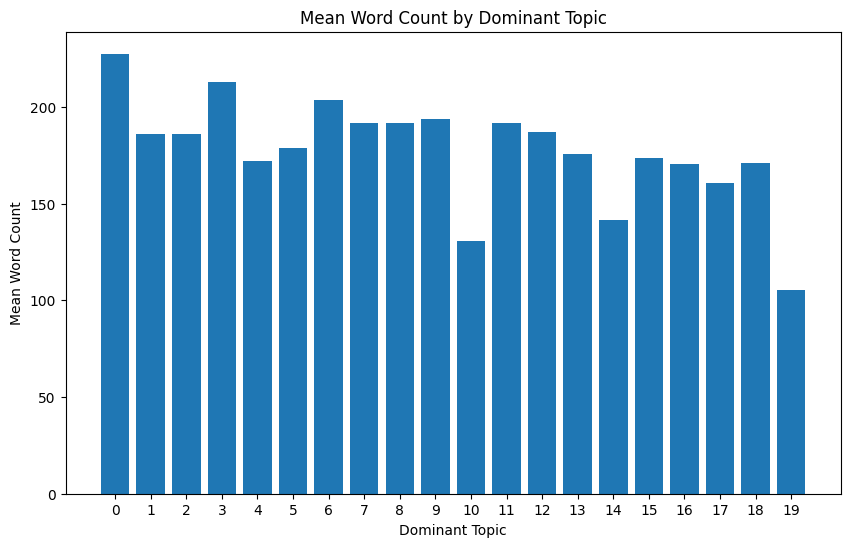

In [26]:
filtered_df['Full_Text'] = filtered_df['Full_Text'].str.split()
filtered_df['Word_Count'] = filtered_df['Full_Text'].apply(len)
topic_stats = filtered_df.groupby('Dominant_Topic')['Word_Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(topic_stats['Dominant_Topic'], topic_stats['Word_Count'])
plt.xlabel('Dominant Topic')
plt.ylabel('Mean Word Count')
plt.title('Mean Word Count by Dominant Topic')
plt.xticks(topic_stats['Dominant_Topic'])
plt.show()

Сходство документов

In [27]:

index = similarities.MatrixSimilarity(lsa_model3[corpus_tfidf2])

random_docs = random.sample(range(len(corpus_tfidf2)), 10)

data = []

for doc_no in random_docs:
    doc = corpus_tfidf2[doc_no]
    doc_text = fulltexts3[doc_no]

    sims = index[lsa_model3[doc]]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])

    for similar_doc_no, similarity in sims[1:]:
        if similarity < 1.0:
            similar_doc_text = fulltexts3[similar_doc_no]
            data.append((doc_no, doc_text, similarity, similar_doc_no, similar_doc_text))
            break

df = pd.DataFrame(data, columns=['Doc1_No', 'Full_Text_Doc1', 'Similarity', 'Doc2_No', 'Full_Text_Doc2'])
print(df)

   Doc1_No                                     Full_Text_Doc1  Similarity  \
0    10020  Заявление  Эстонии  об отказе от ратификации д...    0.984954   
1     6152  Журналист  Виктор Шендерович  сообщил о смерти...    0.981775   
2     3421  СМИ узнали, Джаред Лето, Аль Пачино, Роберт Де...    0.987088   
3     7902  Источник, близкий Marvel, заявил, что узнал на...    0.995649   
4     4434  Бывший глава Федерального бюро расследований  ...    0.978701   
5     1693  Федеральная резервная система  (ФРС) США высво...    0.949248   
6     7652  Совбез ООН  единогласно принял резолюцию о защ...    0.922748   
7    10096  Около 30 студентов и 12 преподавателей пострад...    0.887869   
8     7612  Вспышка  коронавирусной инфекции  по всему мир...    0.968261   
9     7995  Сидя на карантине или работая из дома, есть уг...    0.982433   

   Doc2_No                                     Full_Text_Doc2  
0     9861  Сенатор  Алексей Пушков  прокомментировал в св...  
1     2796  Оперный певе

In [33]:
tmp_fname = get_tmpfile("lsi.model")
lsa_model3.save(tmp_fname)

loaded_model = LsiModel.load(tmp_fname)